In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [5]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Exploring columns

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

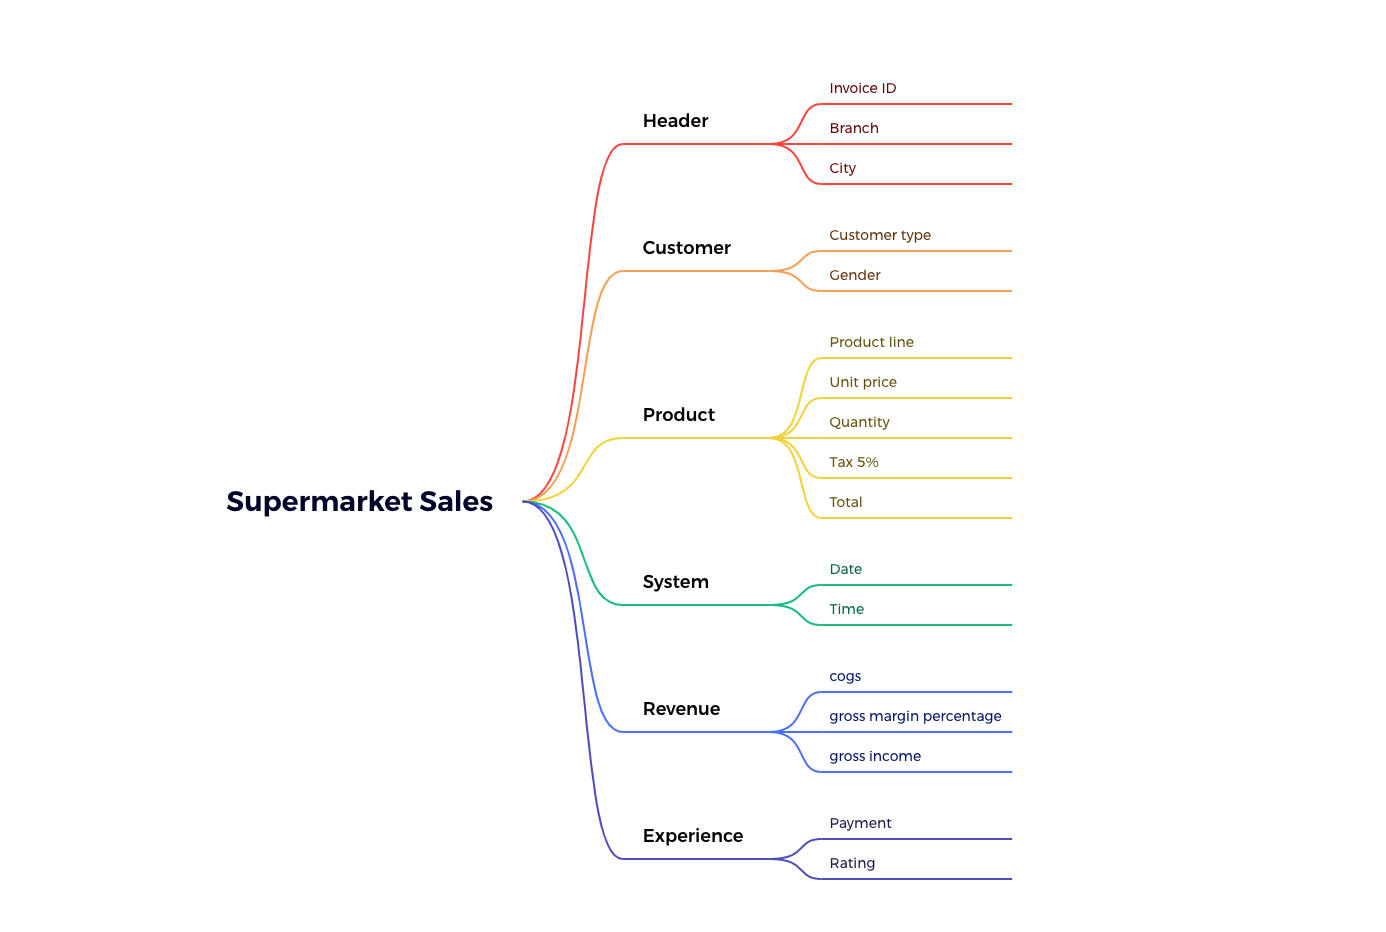

In [7]:
df.describe(include='all').round(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.00,1000.00,1000.00,1000.00,1000,1000,1000,1000.00,1000.00,1000.00,1000.00
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.67,5.51,15.38,322.97,NaN,NaN,NaN,307.59,4.76,15.38,6.97
std,NaN,NaN,NaN,NaN,NaN,NaN,26.49,2.92,11.71,245.89,NaN,NaN,NaN,234.18,0.00,11.71,1.72
min,NaN,NaN,NaN,NaN,NaN,NaN,10.08,1.00,0.51,10.68,NaN,NaN,NaN,10.17,4.76,0.51,4.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.88,3.00,5.92,124.42,NaN,NaN,NaN,118.50,4.76,5.92,5.50
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.23,5.00,12.09,253.85,NaN,NaN,NaN,241.76,4.76,12.09,7.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.94,8.00,22.45,471.35,NaN,NaN,NaN,448.90,4.76,22.45,8.50


In [8]:
def explore_columns(df):
    the_cols = ["Invoice ID", "Branch", "City", "Customer type", "Gender", "Product line", "Payment"]
    for i in the_cols:
        # when values are unique
        print("\n",i,"\n")
        if df[i].count() == df[i].nunique():
            print("Unique")
            print("Min",df[i].min())
            print("Max",df[i].max())
            print(df[i].isnull().sum())
        # when values are not unique
        else:
            print("Null Count:",df[i].isnull().sum())
            print(df[i].value_counts())
            #print(df[i].value_counts(normalize=True)*100)
    return 0

In [9]:
explore_columns(df)


 Invoice ID 

Unique
Min 101-17-6199
Max 898-04-2717
0

 Branch 

Null Count: 0
A    340
B    332
C    328
Name: Branch, dtype: int64

 City 

Null Count: 0
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

 Customer type 

Null Count: 0
Member    501
Normal    499
Name: Customer type, dtype: int64

 Gender 

Null Count: 0
Female    501
Male      499
Name: Gender, dtype: int64

 Product line 

Null Count: 0
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

 Payment 

Null Count: 0
Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


0

# Price and Revenue equations

In [10]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


cogs = Unit price * Quantity

Tax 5% = cogs * 5/ 100

Total = cogs + Tax 5%

gross income = Total * gross margin percentage/ 100 


In [11]:
#Checking whether all gross margin percentages are same

df["gross margin percentage"].value_counts()

4.761905    1000
Name: gross margin percentage, dtype: int64

All products have the same gross margin percentage

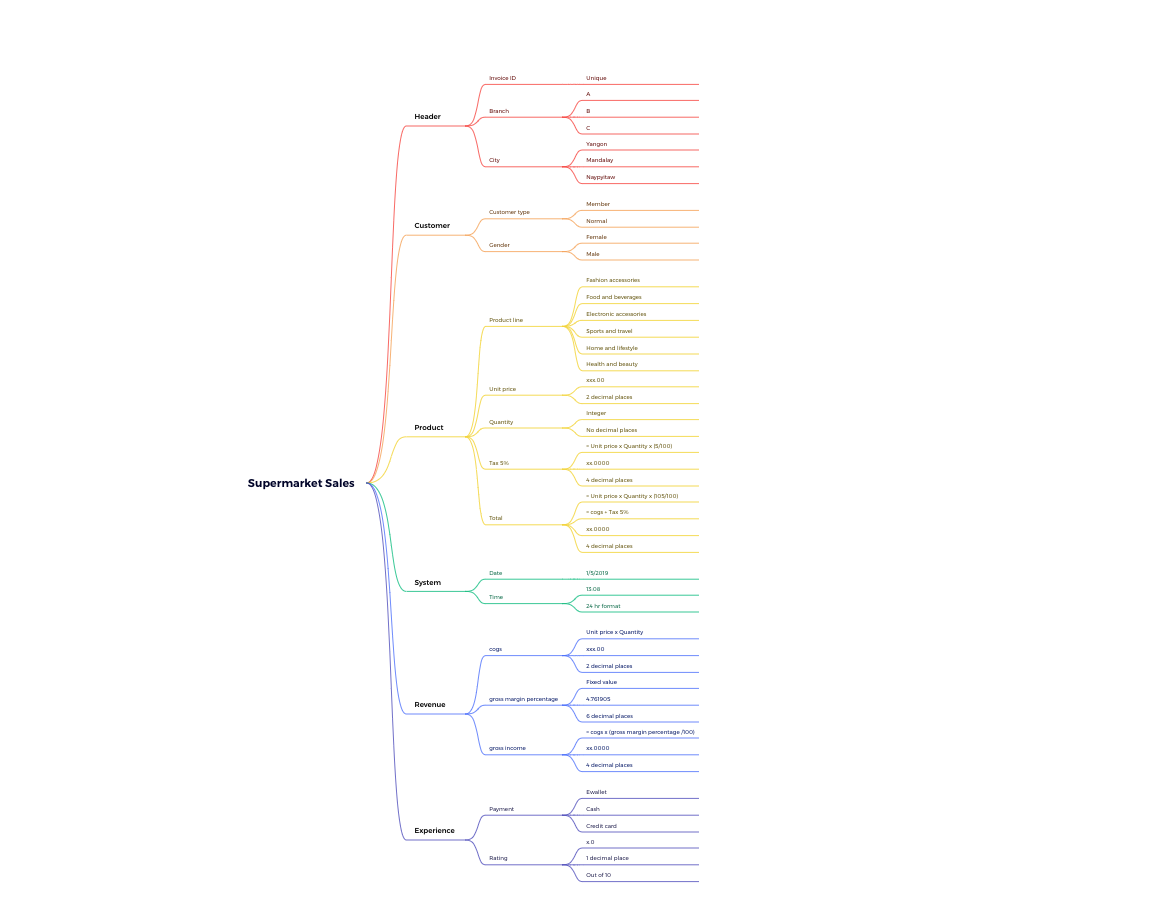

# Questions

<h3> Data : </h3> 

1. Do products of the same product line have the same unit price? 

2. Which City/ Branch sold the highest quantity of products? 

* Which City/Branch earned the highest gross income?

* Gross income by product line

* Gross income by product line by City/Branch 

* Total revenue by payment type


<h3> Behavioural </h3>

* Men are more likely to purchase high price low quantity products.
 - Gender vs quantity vs unit price
 
* Gender vs product-line vs Total

* Members are more likely to purchase higher priced products than non members.
- Customer type vs price unit vs Total

* Gender vs Payment type vs Total

* Gender vs Customer type vs Total vs Payment type vs Rating

<h3> Time series and Date/Time related </h3>

* When (time, month, day) are people more likely to make purchases? Higher revenue

* Revenue fluctuation over time (datetime)

<h3> KPI </h3>

* Target customer description

* Target product description

* Total sales by hour/day/week/month/quater/year

* Average gross income or Average net income

* gross income/ cogs

* Member purchases over time

## 1. Does products of the same product line have the same unit price?

In [37]:
df2 = df.groupby(["Product line", "Unit price"])[[ "Unit price"]].count()
df2

Unit price
Product line           Unit price            
Electronic accessories 10.56                1
                       10.59                1
                       11.81                1
                       11.94                1
                       12.05                1
...                                       ...
Sports and travel      98.13                1
                       98.40                1
                       98.80                1
                       99.24                1
                       99.96                1

[993 rows x 1 columns]

In [38]:
df2["Unit price"].value_counts()

1    986
2      7
Name: Unit price, dtype: int64

In [43]:
df2["Unit price"].value_counts(normalize = True).round(2)*100

1    99.0
2     1.0
Name: Unit price, dtype: float64

In [39]:
df2.loc[df2["Unit price"] > 1]["Unit price"].value_counts

<bound method IndexOpsMixin.value_counts of Product line            Unit price
Electronic accessories  26.26         2
                        52.89         2
Fashion accessories     22.32         2
                        99.82         2
Home and lifestyle      34.42         2
                        78.38         2
Sports and travel       45.58         2
Name: Unit price, dtype: int64>

1. Products of the same product line have different prices. >> One product line does not represent one product.

2. Since each invoice only has one unit price, all extracted invoices are of monotypic product sales.

2. In the selected dataset 99% of the products have unique unit prices. Only 1% are repeated prices. 

3. Since most items have unique unit prices one could say for each unique product most of the time (99% of the time)only one invoice was extracted from sales of that specific product. 

4. ??There is a possibility that *all* of the products in the dataset are unique and the 1% of the time where the unit price is repeated may be due to more than one product bearing the same price.  


## 2. Which City/ Branch sold the highest quantity of products? 